In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
import warnings
warnings.filterwarnings('ignore')

In [19]:
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [20]:
df = pd.read_csv('/content/gdrive/MyDrive/LDS6_K272_ONLINE_TranBaoGiang/Predicting customer churn/Churn_Modelling.csv')

In [21]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# Churn Prediction - What's the Business Case?

A company’s effort to persuade a new customer to sign a contract is many times higher than the costs incurred in retaining existing customers. According to industry experts, it is four times more expensive to win a new customer than keep an existing one. Providers that can identify churn candidates in advance and manage to retain them can significantly reduce costs.


## Permutation Feature Importance
[link text](https://www.relataly.com/anyone-about-to-leave-predicting-the-customer-churn-of-a-telecommunications-provider/2378/)

## Customer Churn

**Customer churn** is a financial term that refers to the loss of a client or customer—that is, when a customer ceases to interact with a company or business. Similarly, the churn rate is the rate at which customers or clients are leaving a company within a specific period of time. A churn rate higher than a certain threshold can have both tangible and intangible effects on a company's business success. Ideally, companies like to retain as many customers as they can.

## Explore name of column

- **CreditScore**: A credit score is a number between 300–850 that depicts a consumer's creditworthiness. The higher the score, the better a borrower looks to potential lenders. A credit score is based on credit history: number of open accounts, total levels of debt, and repayment history, and other factors. Lenders use credit scores to evaluate the probability that an individual will repay loans in a timely manner.

- **Tenure**:  the amount of time you are given to repay your loan

- **Balance**: the balance is the amount of money owed (or due) on an account.

# Pre_processing Data

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


**Note**:  
we can see that the dataset contains 14 clolumns (as known as features or variables).  
The first 13 columns are the independent variable, while the last column is the dependent variable that contains a binary value of 1 or 0.  

- 1: customer left the bank after 6 months.
- 0: customer doesn't left the bank after 6 months.

In [23]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


**Note**:  
We can see that mean and median not large distance in all of feature, so variable can be  normal distrinution.

Min and max have a large value gap, so variable can be same normal distribution and have outlier.

## Determine correlation variables

**Independent feature**

- Continuous variable:  CustomerId,	CreditScore,	Age,	Tenure,	Balance,	NumOfProducts, EstimatedSalary.
- Category variable: Surname, Geography, Gender,HasCrCard,	IsActiveMember.

**Dependent feature**: Exited


### Analyze Exited - Continuous Variable

In [24]:
df1 = df[['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary','Exited']]
df1. head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,Exited
0,619,42,2,0.00,1,101348.88,1
1,608,41,1,83807.86,1,112542.58,0
2,502,42,8,159660.80,3,113931.57,1
3,699,39,1,0.00,2,93826.63,0
4,850,43,2,125510.82,1,79084.10,0


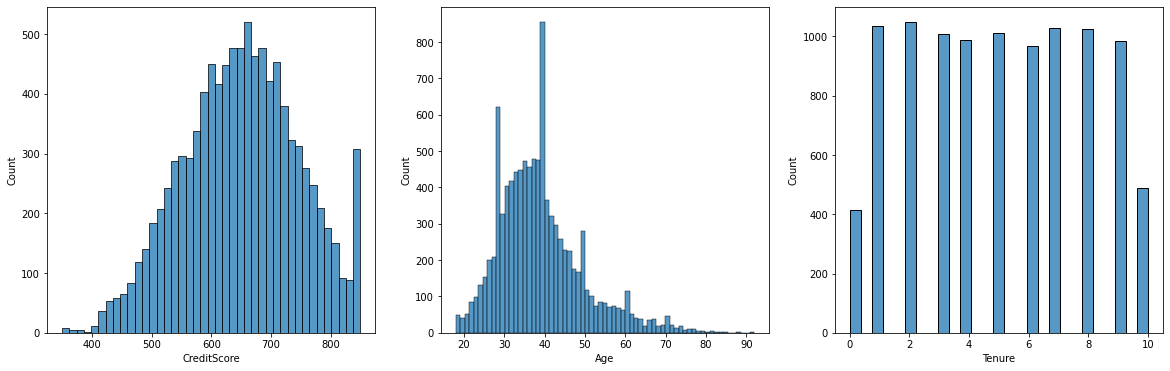

In [25]:
f,(ax1, ax2, ax3) = plt.subplots(1,3, figsize = (20,6))
sns.histplot(df1['CreditScore'], ax = ax1)
sns.histplot(df1['Age'], ax = ax2)
sns.histplot(df1['Tenure'], ax = ax3)
plt.show()

In [ ]:
print('Sknew of CreditScore: ',round(df['CreditScore'].skew(),2),'\n')
print('Kurtosis of CreditScore: ',round(df['CreditScore'].kurtosis(),2),'\n')
print('Sknew of Age: ',round(df['Age'].skew(),2),'\n')
print('Kurtosis of Age: ',round(df['Age'].kurtosis(),2),'\n')

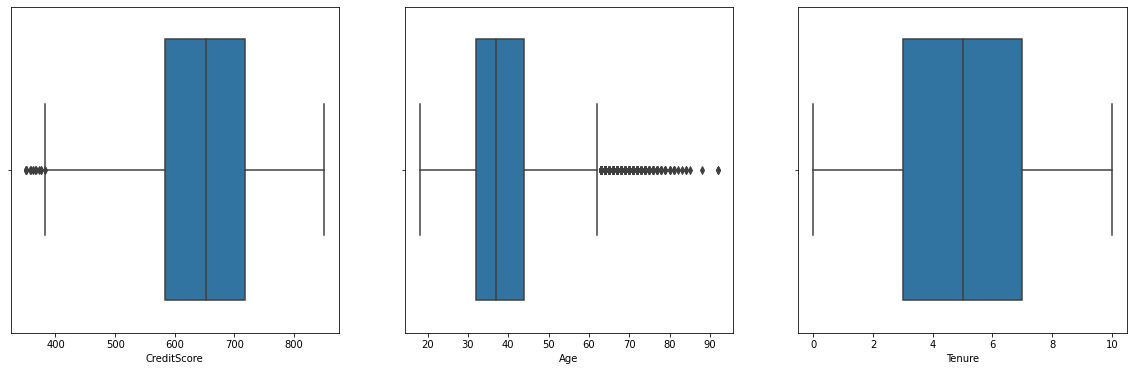

In [62]:
f,(ax1, ax2, ax3) = plt.subplots(1,3, figsize = (20,6))
sns.boxplot(df1['CreditScore'], ax = ax1)
sns.boxplot(df1['Age'], ax = ax2)
sns.boxplot(df1['Tenure'], ax = ax3)
plt.show()

CredistScore có mô hình phần phối lệch trái và tù hơn so với phân phối chuẩn.  
- CredistScore tập trung trong khoảng 600 đến 700
- Max CredistScore: 850
- Min CredisScore: 350   

Age có mô hình phân phối lệch phải và nhọn hơn so với phân phối chuẩn.  
- Age tập trung trong khoản 30 đến 40
- Max Age: 92
- Min Age: 18

Tenure tập trung từ 1 đến 9

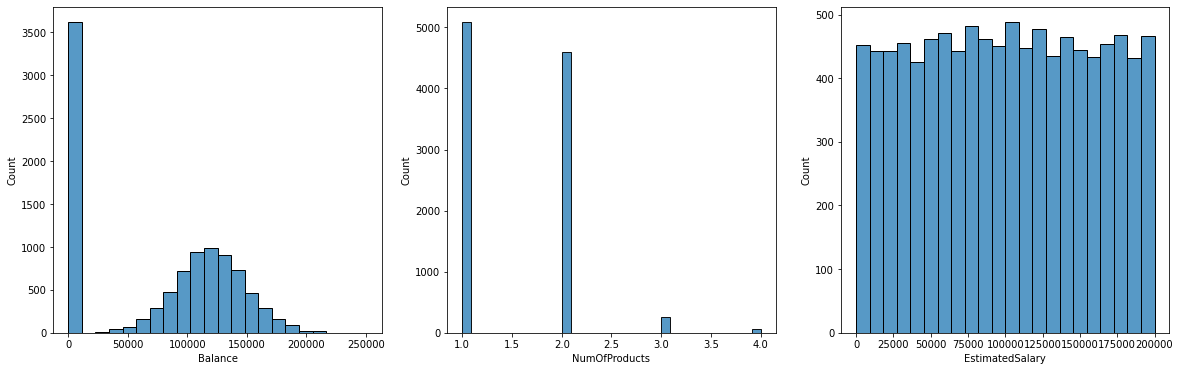

In [27]:
f,(ax1, ax2, ax3) = plt.subplots(1,3, figsize = (20,6))
sns.histplot(df1['Balance'], ax = ax1)
sns.histplot(df1['NumOfProducts'], ax = ax2)
sns.histplot(df1['EstimatedSalary'], ax = ax3)
plt.show()

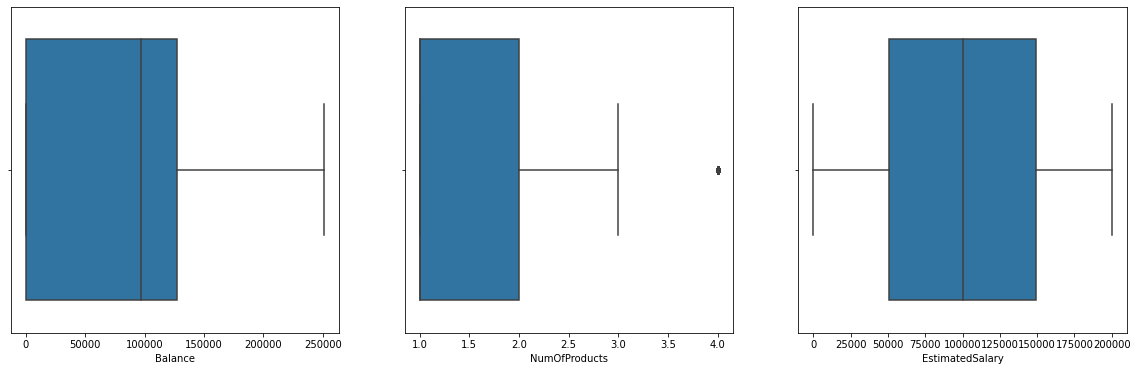

In [63]:
f,(ax1, ax2, ax3) = plt.subplots(1,3, figsize = (20,6))
sns.boxplot(df1['Balance'], ax = ax1)
sns.boxplot(df1['NumOfProducts'], ax = ax2)
sns.boxplot(df1['EstimatedSalary'], ax = ax3)
plt.show()

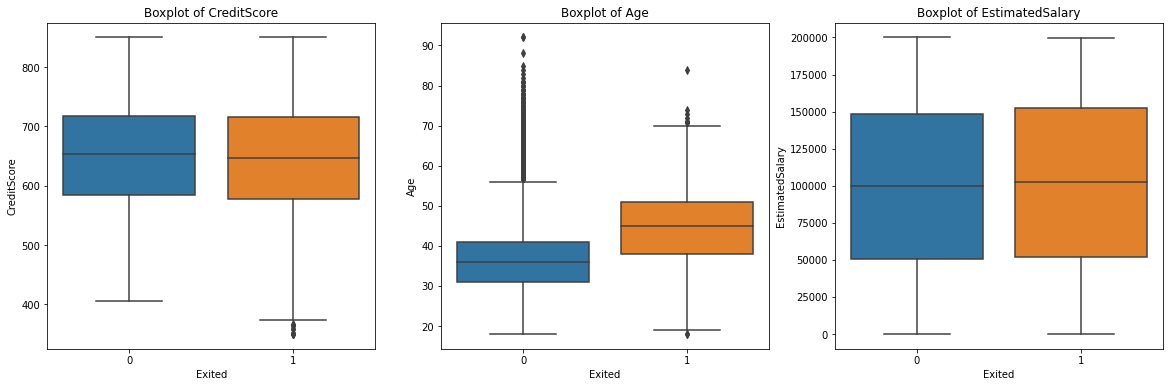

In [28]:
f,(ax1,ax2,ax3) = plt.subplots(1,3,figsize=(20,6))
sns.boxplot(data=df1, x='Exited', y='CreditScore',ax=ax1)
ax1.set_title('Boxplot of CreditScore')
sns.boxplot(data=df1, x='Exited', y='Age',ax=ax2)
ax2.set_title('Boxplot of Age')
sns.boxplot(data=df1, x='Exited', y='EstimatedSalary',ax=ax3)
ax3.set_title('Boxplot of EstimatedSalary')
plt.show()

In [29]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [30]:
ano_model1 = ols('Exited ~ C(CreditScore) + C(Age)',data=df1).fit()

In [31]:
ano_model1

In [32]:
ano_table1 = sm.stats.anova_lm(ano_model1,typ=3)
ano_table1

,sum_sq,df,F,PR(>F)
Intercept,1.711508,1.0,12.522882,4.039248e-04
C(CreditScore),66.914006,459.0,1.066669,1.624155e-01
C(Age),244.896904,69.0,25.969260,2.418740e-298
Residual,1294.405871,9471.0,NaN,NaN


Từ kết quả phân tích ANOVA cho thấy CreditScore và Age có ảnh hưởng đến Exited.

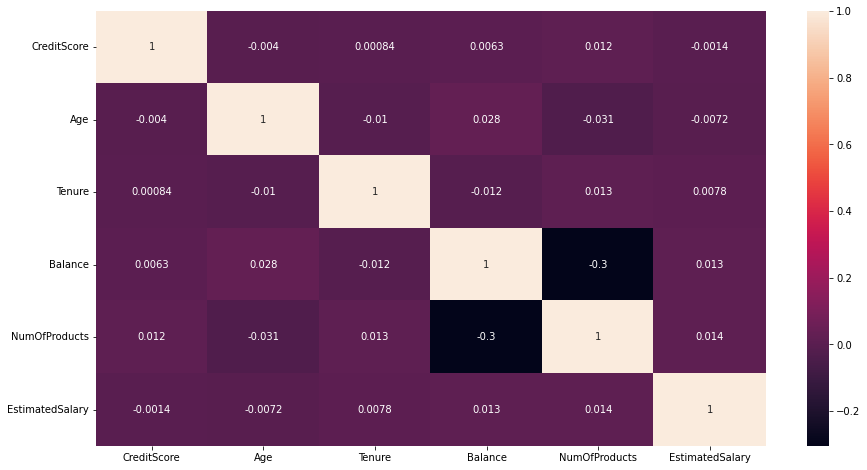

In [36]:
#Correlation matrix of continuous variable
plt.figure(figsize=(15,8))
corrMatrix = df1.drop(columns = ['Exited']).corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

Correlation results show that all of continuous variable don't have correlation, because corr parameter less than 0.3 and -0.3.  
--> Continuous feature is independent.

### Analyze Category - Exited

In [41]:
df2 = df[['Geography', 'Gender','HasCrCard', 'IsActiveMember','Exited']]
df2.head()

,Geography,Gender,HasCrCard,IsActiveMember,Exited
0,France,Female,1,1,1
1,Spain,Female,0,1,0
2,France,Female,1,0,1
3,France,Female,0,0,0
4,Spain,Female,1,1,0


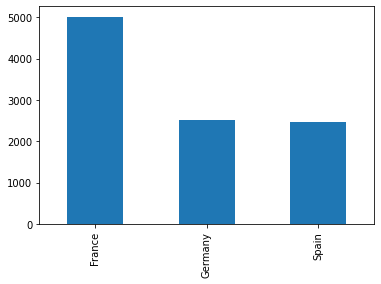

In [42]:
df2['Geography'].value_counts().plot(kind = 'bar')
plt.show()

**Note**:  
Most of customer are Frances.

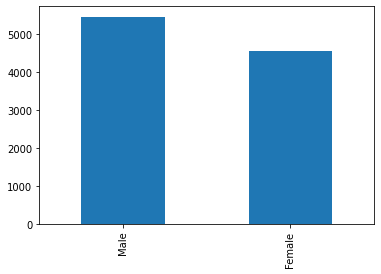

In [43]:
df2['Gender'].value_counts().plot(kind = 'bar')
plt.show()

**Note**:  
Most of customer is male.

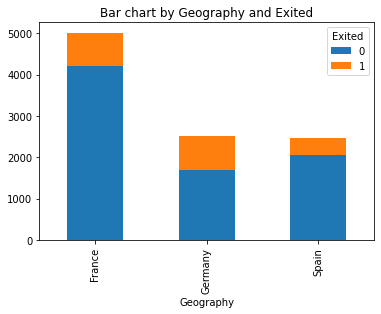

In [53]:
geo = pd.crosstab(df2['Geography'], df2['Exited'])
geo.plot(kind='bar',stacked=True)
plt.title('Bar chart by Geography and Exited')
plt.show()

**Note**:  
The most of customer from all 3 countries doesn't left after 6 months.

In [54]:
from scipy.stats import chi2_contingency, chi2

In [55]:
stat, p, dof, expected = chi2_contingency(geo)

In [56]:
print('dof: ', dof)
print('Statistic: ', stat)
print('P-value:', p)

dof:  2
Statistic:  301.25533682434536
P-value: 3.8303176053541544e-66


In [57]:
prob = 0.95
alpha = 1.0 - prob
if p <= alpha:
    print('Reject H0 --> geo và exited không phải là 2 biến độc lập')
else:
    print('Fail reject H0 --> geo và exited là 2 biến độc lập')

Reject H0 --> geo và exited không phải là 2 biến độc lập


<Figure size 576x432 with 0 Axes>

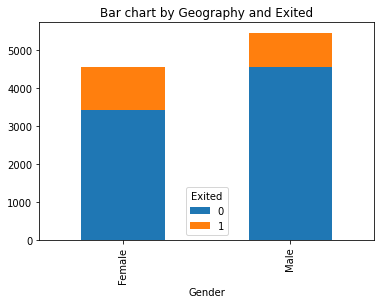

In [79]:
gen = pd.crosstab(df2['Gender'], df2['Exited'])
plt.figure(figsize = (8,6))
gen.plot(kind='bar',stacked=True)
plt.title('Bar chart by Geography and Exited')
plt.show()

In [59]:
stat, p, dof, expected = chi2_contingency(gen)

In [60]:
print('dof: ', dof)
print('Statistic: ', stat)
print('P-value:', p)

dof:  1
Statistic:  112.91857062096116
P-value: 2.2482100097131755e-26


In [61]:
prob = 0.95
alpha = 1.0 - prob
if p <= alpha:
    print('Reject H0 --> gen và exited không phải là 2 biến độc lập')
else:
    print('Fail reject H0 --> gen và exited là 2 biến độc lập')

Reject H0 --> gen và exited không phải là 2 biến độc lập


### **Summary** 
Select feature:  
- Continuous variable:  CreditScore,	Age,	Tenure,	Balance,	NumOfProducts, EstimatedSalary.
- Category variable: Geography, Gender,HasCrCard,	IsActiveMember.


# Data Analysis

In [64]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## Exited by Number of Product

<Figure size 576x432 with 0 Axes>

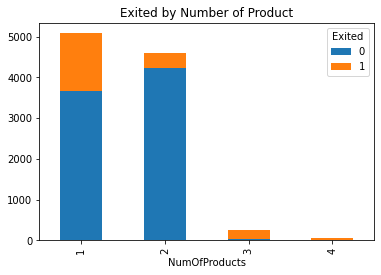

In [80]:
plt.figure(figsize = (8,6))
pd.crosstab(df['NumOfProducts'],df['Exited']).plot(kind = 'bar',stacked=True)
plt.title('Exited by Number of Product')
plt.show()

Phần lớn khách hàng có 1 và 2 sản phẩm. Khách hàng có 1 đến 2 sản phẩm có xu hướng không rời đi sau 6 tháng. 

Tuy nhiên, nhóm khách hàng có 3 sản phẩm trở lên có xu hướng rời đi sau 6 tháng.

## Exited by Has Credit Card

<Figure size 576x432 with 0 Axes>

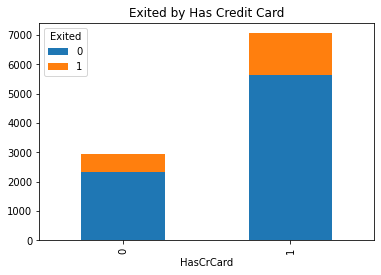

In [81]:
plt.figure(figsize = (8,6))
pd.crosstab(df['HasCrCard'],df['Exited']).plot(kind = 'bar',stacked=True)
plt.title('Exited by Has Credit Card')
plt.show()

Phần lớn khách hàng có creadit card.

Phần lớn khách hàng không có credit card và không có credit card đều có xu hướng ở lại sau 6 tháng.



In [85]:
gen_num = df.groupby(['Gender','NumOfProducts','Exited'])['CustomerId'].count().reset_index()
gen_num

,Gender,NumOfProducts,Exited,CustomerId
0,Female,1,0,1534
1,Female,1,1,762
2,Female,2,0,1850
3,Female,2,1,210
4,Female,3,0,20
5,Female,3,1,129
6,Female,4,1,38
7,Male,1,0,2141
8,Male,1,1,647
9,Male,2,0,2392


In [104]:
fe_num = gen_num[gen_num['Gender']=='Female']
fe_num['NumOfProducts'] = pd.Categorical(fe_num.NumOfProducts)
fe_num['Exited'] = pd.Categorical(fe_num.Exited)
fe_num.rename(columns = {'CustomerId':'Number Of Customer'}, inplace = True)

In [114]:
ma_num = gen_num[gen_num['Gender']=='Male']
ma_num['NumOfProducts'] = pd.Categorical(ma_num.NumOfProducts)
ma_num['Exited'] = pd.Categorical(ma_num.Exited)
ma_num.rename(columns = {'CustomerId':'Number Of Customer'}, inplace = True)

## Gender: Number of Customer by Number of Products & Exited

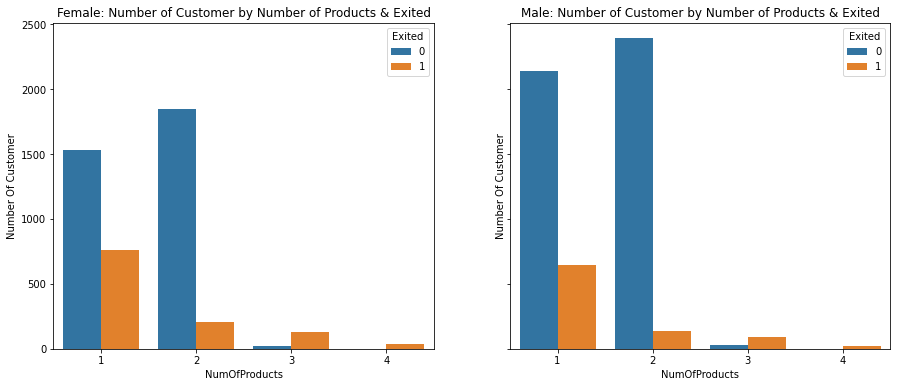

In [116]:
f,(ax1,ax2) = plt.subplots(1,2, sharey = True, figsize = (15,6))
sns.barplot(x=fe_num['NumOfProducts'], y=fe_num['Number Of Customer'], hue = fe_num['Exited'], data = fe_num, ax = ax1).set_title('Female: Number of Customer by Number of Products & Exited')
sns.barplot(x=ma_num['NumOfProducts'], y=ma_num['Number Of Customer'], hue = ma_num['Exited'], data = ma_num, ax = ax2).set_title('Male: Number of Customer by Number of Products & Exited')
plt.show()

## Gender: Number of Customer by Salary_level & Exited

In [139]:
 df['Salary_level'] = pd.qcut(df['EstimatedSalary'], q=5, precision=0)

In [140]:
gen_salary  = df.groupby(['Gender','Salary_level','Exited'])['CustomerId'].count().reset_index()
gen_salary.rename(columns = {'CustomerId':'NumberOfCustomer'}, inplace = True)

In [141]:
fe_salary = gen_salary[gen_salary['Gender']=='Female']
fe_salary['Salary_level'] = pd.Categorical(fe_salary.Salary_level)
fe_salary['Exited'] = pd.Categorical(fe_salary.Exited)

In [142]:
ma_salary = gen_salary[gen_salary['Gender']=='Male']
ma_salary['Salary_level'] = pd.Categorical(ma_salary.Salary_level)
ma_salary['Exited'] = pd.Categorical(ma_salary.Exited)

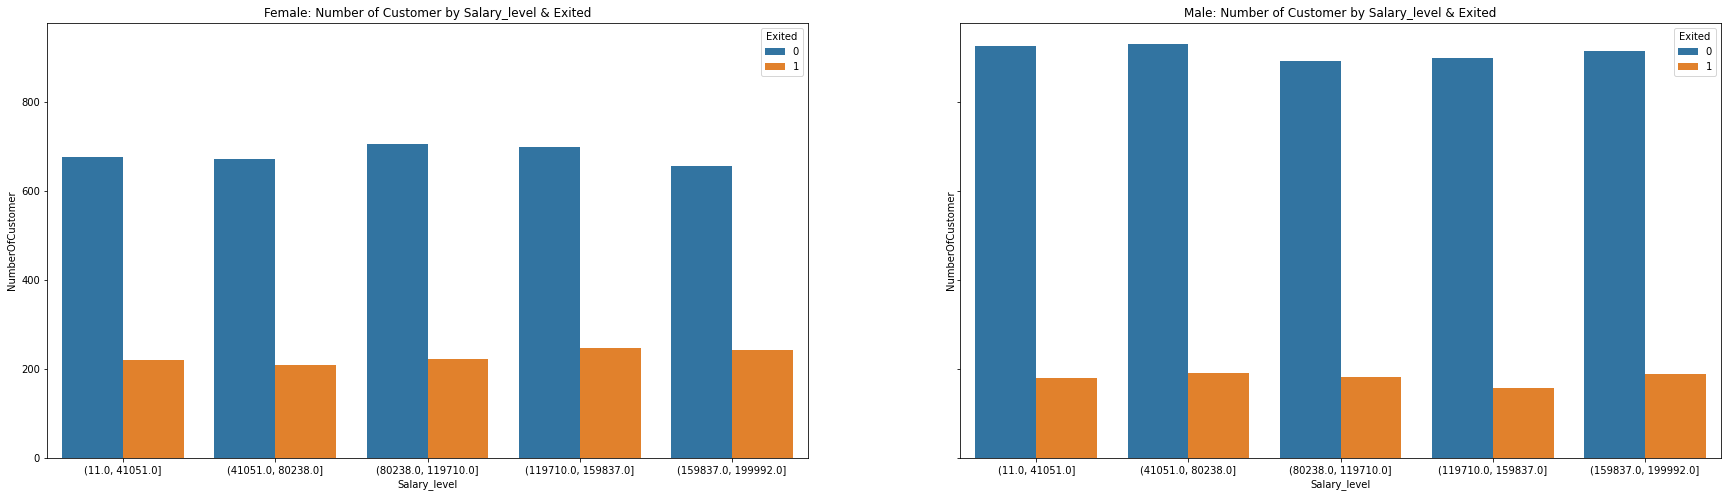

In [145]:
f,(ax1,ax2) = plt.subplots(1,2, sharey = True, figsize = (30,8))
sns.barplot(x=fe_salary['Salary_level'], y=fe_salary['NumberOfCustomer'], hue = fe_salary['Exited'], data = fe_salary, ax = ax1).set_title('Female: Number of Customer by Salary_level & Exited')
sns.barplot(x=ma_salary['Salary_level'], y=ma_salary['NumberOfCustomer'], hue = ma_salary['Exited'], data = ma_salary, ax = ax2).set_title('Male: Number of Customer by Salary_level & Exited')
plt.show()

# Scaler Data

In [149]:
X = df[['CreditScore', 'Age', 'Tenure','Balance', 'NumOfProducts', 'EstimatedSalary','Geography', 'Gender','HasCrCard', 'IsActiveMember']]
y = df[['Exited']]

## Dummies

In [150]:
X1 = pd.get_dummies(X)

In [151]:
X1.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,HasCrCard,IsActiveMember,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,101348.88,1,1,1,0,0,1,0
1,608,41,1,83807.86,1,112542.58,0,1,0,0,1,1,0
2,502,42,8,159660.80,3,113931.57,1,0,1,0,0,1,0
3,699,39,1,0.00,2,93826.63,0,0,1,0,0,1,0
4,850,43,2,125510.82,1,79084.10,1,1,0,0,1,1,0


## StandardScaler

In [152]:
from sklearn.preprocessing import StandardScaler

In [153]:
sc = StandardScaler()

In [154]:
X2 = sc.fit_transform(X1)

In [156]:
X2

array([[-0.32622142,  0.29351742, -1.04175968, ..., -0.57380915,
         1.09598752, -1.09598752],
       [-0.44003595,  0.19816383, -1.38753759, ...,  1.74273971,
         1.09598752, -1.09598752],
       [-1.53679418,  0.29351742,  1.03290776, ..., -0.57380915,
         1.09598752, -1.09598752],
       ...,
       [ 0.60498839, -0.27860412,  0.68712986, ..., -0.57380915,
         1.09598752, -1.09598752],
       [ 1.25683526,  0.29351742, -0.69598177, ..., -0.57380915,
        -0.91241915,  0.91241915],
       [ 1.46377078, -1.04143285, -0.35020386, ..., -0.57380915,
         1.09598752, -1.09598752]])

## Build Model

In [157]:
from sklearn.model_selection import train_test_split

In [158]:
X_train, X_test, y_train, y_test = train_test_split(X1,y, test_size = 0.3, random_state = 42)

In [159]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

In [160]:
models = [
    LogisticRegression(multi_class='multinomial',solver='lbfgs'),
    GaussianNB(),
    KNeighborsClassifier(n_neighbors=5),
    DecisionTreeClassifier(),
    RandomForestClassifier(n_estimators=30),
    SVC(kernel='linear')
]

In [ ]:
CV = 10 
cv_df = pd.DataFrame(index=range(CV * len(models)))
cv_entries = []

for model in models:
    model_name = model.__class__.__name__ 
    accuracies = cross_val_score(model,X=X1,y=y,scoring='accuracy',cv=CV)
    cv_entries.append([model_name,accuracies.mean()])
cv_df = pd.DataFrame(cv_entries,columns=['model_name','accuracies'])